# Import Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import mode 
from sklearn.preprocessing import LabelEncoder
import os

# Load Dataset 

In [2]:
train_data = pd.read_csv(r"C:\Users\mgg919682\Downloads\BigMart\Train.csv")
test_data = pd.read_csv(r"C:\Users\mgg919682\Downloads\BigMart\Test.csv")

In [3]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
cat_col = []
for x in train_data.dtypes.index:
    if train_data.dtypes[x] == 'object':
        cat_col.append(x)
        
cat_col

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [7]:
for col in cat_col:
    print(col)
    print(train_data[col].value_counts())
    print()

Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
O

# Data Pre-Processing 


In [8]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [9]:
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
train_data.shape

(8523, 12)

In [11]:
test_data.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [12]:
train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [13]:
train_data['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [14]:
## item weight is numerical column so replace with mean

In [15]:
train_data['Item_Weight'].fillna(train_data['Item_Weight'].mean(), inplace=True)
test_data['Item_Weight'].fillna(test_data['Item_Weight'].mean(), inplace=True)

In [16]:
test_data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [17]:
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [18]:
train_data['Outlet_Size']

0       Medium
1       Medium
2       Medium
3          NaN
4         High
         ...  
8518      High
8519       NaN
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

In [19]:
test_data['Outlet_Size']

0       Medium
1          NaN
2          NaN
3          NaN
4       Medium
         ...  
5676     Small
5677    Medium
5678       NaN
5679       NaN
5680       NaN
Name: Outlet_Size, Length: 5681, dtype: object

In [20]:
## Outlet size is cat data so replaced with mode

In [21]:
train_data['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [22]:
test_data['Outlet_Size'].value_counts()

Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64

In [23]:
train_data['Outlet_Size'].fillna(train_data['Outlet_Size'].mode()[0], inplace= True)
test_data['Outlet_Size'].fillna(train_data['Outlet_Size'].mode()[0], inplace= True)

In [24]:
train_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [25]:
test_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [26]:
sum(train_data['Item_Visibility']==0)

526

In [27]:
train_data.loc[:, 'Item_Visibility'].replace([0], [train_data['Item_Visibility'].mean()], inplace= True)

In [28]:
sum(train_data['Item_Visibility']==0)

0

In [29]:
# train_data.drop(['Item_Identifier','Outlet_Identifier'], axis=1, inplace= True)

In [30]:
# combine item fat content 

train_data['Item_Fat_Content']= train_data['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})
train_data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [31]:
train_data['New_Item_type'] = train_data['Item_Identifier'].apply(lambda x: x[ :2])
train_data['New_Item_type']

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: New_Item_type, Length: 8523, dtype: object

In [32]:
train_data['New_Item_type'] = train_data['New_Item_type'].map({'FD':'Food','NC':'Non_Consumable','DR': 'Drinks'})
train_data['New_Item_type'].value_counts()

Food              6125
Non_Consumable    1599
Drinks             799
Name: New_Item_type, dtype: int64

In [33]:
train_data['Outlet_Years']= 2013-train_data['Outlet_Establishment_Year']

In [34]:
train_data['Outlet_Years']

0       14
1        4
2       14
3       15
4       26
        ..
8518    26
8519    11
8520     9
8521     4
8522    16
Name: Outlet_Years, Length: 8523, dtype: int64

In [35]:
train_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_type,Outlet_Years
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,14
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,4
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,14
3,FDX07,19.200,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,Food,15
4,NCD19,8.930,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non_Consumable,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,Food,26
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850,Food,11
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,Non_Consumable,9
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,Food,4


In [36]:
import dtale
dtale.show(train_data)

In [37]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_type,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,14
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,Food,15
4,NCD19,8.93,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non_Consumable,26


C:\Users\mgg919682\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Item_Weight'>

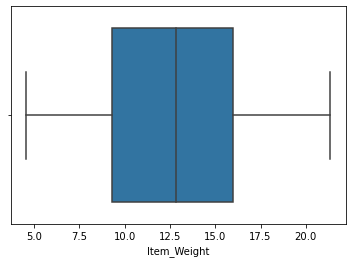

In [38]:
sns.boxplot(train_data['Item_Weight'])

C:\Users\mgg919682\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

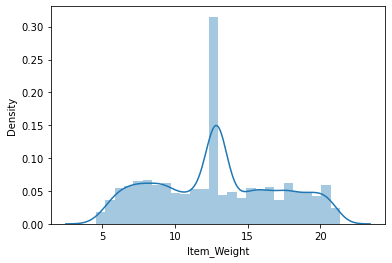

In [39]:
#plt.hist(train_data['Item_Weight'],bins=50)
#plt.show()
sns.distplot(train_data.Item_Weight)

C:\Users\mgg919682\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Item_MRP'>

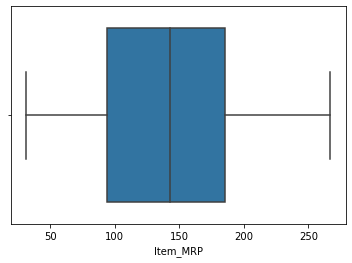

In [40]:
sns.boxplot(train_data['Item_MRP'])

C:\Users\mgg919682\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

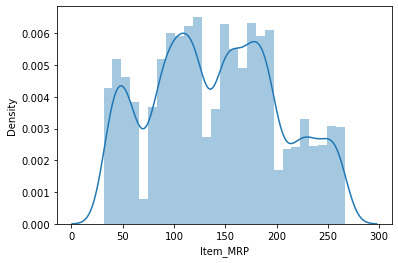

In [41]:
sns.distplot(train_data.Item_MRP)

C:\Users\mgg919682\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

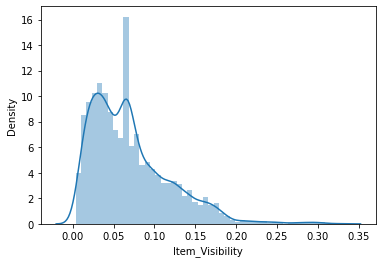

In [42]:
sns.distplot(train_data.Item_Visibility)

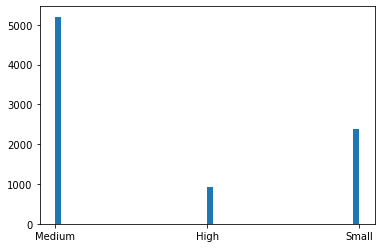

In [43]:
plt.hist(train_data['Outlet_Size'],bins=50)
plt.show()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

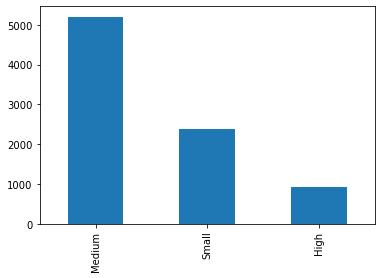

In [44]:
train_data.Outlet_Size.value_counts().plot(kind='bar')
train_data.Outlet_Size.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

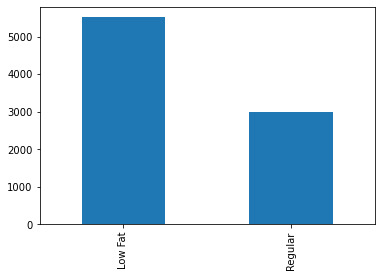

In [45]:
train_data.Item_Fat_Content.value_counts().plot(kind='bar')
train_data.Item_Fat_Content.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

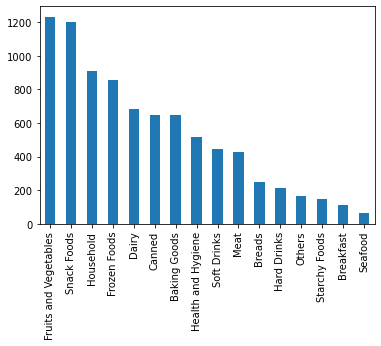

In [46]:
#Item_Type
train_data.Item_Type.value_counts().plot(kind='bar')
train_data.Item_Type.value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

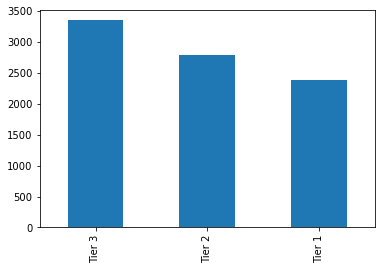

In [47]:
#Outlet_Location_Type
train_data.Outlet_Location_Type.value_counts().plot(kind='bar')
train_data.Outlet_Location_Type.value_counts()

In [48]:
train_data.corr() 


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years
Item_Weight,1.000000,-0.017450,0.024756,-0.008301,0.011550,0.008301
Item_Visibility,-0.017450,1.000000,-0.005259,-0.078355,-0.134138,0.078355
Item_MRP,0.024756,-0.005259,1.000000,0.005020,0.567574,-0.005020
Outlet_Establishment_Year,-0.008301,-0.078355,0.005020,1.000000,-0.049135,-1.000000
Item_Outlet_Sales,0.011550,-0.134138,0.567574,-0.049135,1.000000,0.049135
Outlet_Years,0.008301,0.078355,-0.005020,-1.000000,0.049135,1.000000


<AxesSubplot:>

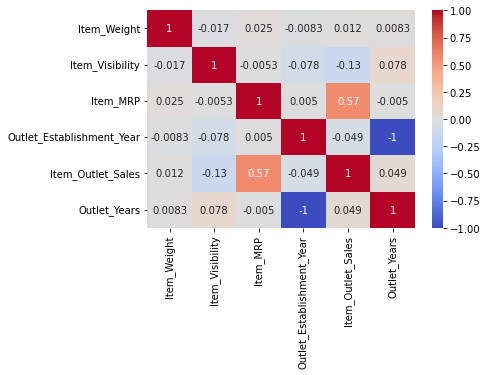

In [49]:
corr = train_data.corr()
sns.heatmap(corr, annot = True , cmap= 'coolwarm')

In [50]:
train_data.drop(['Item_Identifier','Outlet_Identifier'], axis=1, inplace= True)

In [51]:
train_data

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_type,Outlet_Years
0,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,14
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,4
2,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,14
3,19.200,Regular,0.066132,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800,Food,15
4,8.930,Low Fat,0.066132,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052,Non_Consumable,26
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,1987,High,Tier 3,Supermarket Type1,2778.3834,Food,26
8519,8.380,Regular,0.046982,Baking Goods,108.1570,2002,Medium,Tier 2,Supermarket Type1,549.2850,Food,11
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,2004,Small,Tier 2,Supermarket Type1,1193.1136,Non_Consumable,9
8521,7.210,Regular,0.145221,Snack Foods,103.1332,2009,Medium,Tier 3,Supermarket Type2,1845.5976,Food,4


In [52]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

train_data_le = train_data.apply(LabelEncoder().fit_transform) 

In [53]:
train_data_le

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_type,Outlet_Years
0,284,0,663,4,5592,4,1,0,1,2540,1,4
1,57,1,879,14,473,8,1,2,2,422,0,0
2,376,0,714,10,2901,4,1,0,1,1639,1,4
3,393,1,4432,6,4227,3,1,2,0,670,1,5
4,265,0,4432,9,627,1,0,2,1,865,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,125,0,3911,13,4955,1,0,2,1,2047,1,7
8519,233,1,3277,0,2023,5,1,1,1,516,1,3
8520,299,0,2301,8,1263,6,2,1,1,1018,2,2
8521,149,1,7175,13,1857,8,1,2,2,1466,1,0


In [54]:
train_data_oneHot = pd.get_dummies(train_data_le, columns=['Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Outlet_Type'])

train_data_oneHot

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,New_Item_type,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3
0,284,663,4,5592,4,2540,1,4,1,0,0,1,0,1,0,0,0,1,0,0
1,57,879,14,473,8,422,0,0,0,1,0,1,0,0,0,1,0,0,1,0
2,376,714,10,2901,4,1639,1,4,1,0,0,1,0,1,0,0,0,1,0,0
3,393,4432,6,4227,3,670,1,5,0,1,0,1,0,0,0,1,1,0,0,0
4,265,4432,9,627,1,865,2,7,1,0,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,125,3911,13,4955,1,2047,1,7,1,0,1,0,0,0,0,1,0,1,0,0
8519,233,3277,0,2023,5,516,1,3,0,1,0,1,0,0,1,0,0,1,0,0
8520,299,2301,8,1263,6,1018,2,2,1,0,0,0,1,0,1,0,0,1,0,0
8521,149,7175,13,1857,8,1466,1,0,0,1,0,1,0,0,0,1,0,0,1,0


In [55]:
#train_data_ohe = pd.get_dummies(train_data)
#train_data_ohe.head()

In [56]:
#Splitting data 

from sklearn.model_selection import train_test_split

X = train_data_oneHot.drop('Item_Outlet_Sales', axis=1)
y = train_data_oneHot['Item_Outlet_Sales']

# split train data into two parts :  train - 80% and validation - 20%
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=2)

In [57]:
X_train

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,New_Item_type,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3
7173,314,3950,10,3197,2,1,6,0,1,0,0,1,1,0,0,0,1,0,0
3315,326,4432,0,1749,0,1,8,1,0,0,1,0,0,0,1,0,0,0,1
5932,191,3338,3,5581,2,1,6,1,0,0,0,1,1,0,0,0,1,0,0
7872,298,3624,5,1401,2,1,6,1,0,0,0,1,1,0,0,0,1,0,0
5946,326,7806,13,401,0,1,8,0,1,0,0,1,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,151,5985,13,4616,2,1,6,1,0,0,0,1,1,0,0,0,1,0,0
2514,395,6507,13,5127,2,1,6,1,0,0,0,1,1,0,0,0,1,0,0
6637,388,5677,10,4271,7,1,1,0,1,0,1,0,0,1,0,0,1,0,0
2575,260,5470,7,3281,5,0,3,1,0,0,1,0,0,1,0,0,1,0,0


In [58]:
X_val

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,New_Item_type,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3
1112,326,5976,6,1007,0,1,8,1,0,0,1,0,0,0,1,0,0,0,1
1751,318,6886,5,5537,5,1,3,1,0,0,1,0,0,1,0,0,1,0,0
7648,49,6882,4,1344,5,1,3,1,0,0,1,0,0,1,0,0,1,0,0
7362,371,5484,8,2611,3,2,5,1,0,0,1,0,0,0,1,1,0,0,0
5332,326,169,5,1835,0,1,8,1,0,0,0,1,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3503,326,2499,13,2655,0,1,8,1,0,0,1,0,0,0,1,0,0,0,1
975,401,1677,6,423,6,1,2,0,1,0,0,1,0,1,0,0,1,0,0
6190,392,7644,9,3889,7,2,1,1,0,0,1,0,0,1,0,0,1,0,0
32,388,4432,13,5736,8,1,0,1,0,0,1,0,0,0,1,0,0,1,0


In [59]:
y_train

7173    1347
3315    2153
5932    1881
7872     861
5946      15
        ... 
1099    1536
2514    1582
6637    1577
2575    1154
7336    1452
Name: Item_Outlet_Sales, Length: 6818, dtype: int64

In [60]:
y_val

1112    1264
1751    3309
7648     926
7362     355
5332      69
        ... 
3503    2743
975     1038
6190    1272
32      2212
4433    3130
Name: Item_Outlet_Sales, Length: 1705, dtype: int64

In [61]:
#from sklearn.proprocessing import StandardScaler
#sc = StandardScaler


In [62]:
#X_train_std = sc.fit_transform(X_train)
#X_train_std

In [63]:
#X_test_std = sc.fit_transform(X_test)
#X_test_std

In [64]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_train)

In [65]:
X_train.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,New_Item_type,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3
7173,314,3950,10,3197,2,1,6,0,1,0,0,1,1,0,0,0,1,0,0
3315,326,4432,0,1749,0,1,8,1,0,0,1,0,0,0,1,0,0,0,1
5932,191,3338,3,5581,2,1,6,1,0,0,0,1,1,0,0,0,1,0,0
7872,298,3624,5,1401,2,1,6,1,0,0,0,1,1,0,0,0,1,0,0
5946,326,7806,13,401,0,1,8,0,1,0,0,1,1,0,0,1,0,0,0


In [66]:
lin_reg.predict(X_train)

array([1701.71564316, 1878.68237171, 2450.10689318, ..., 2094.06375021,
       1677.45184713, 1719.10612563])

In [67]:
y_train

7173    1347
3315    2153
5932    1881
7872     861
5946      15
        ... 
1099    1536
2514    1582
6637    1577
2575    1154
7336    1452
Name: Item_Outlet_Sales, Length: 6818, dtype: int64

In [68]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [69]:
print(r2_score(y_train,y_pred))
print(mean_absolute_error(y_train,y_pred))
print(np.sqrt(mean_squared_error(y_train,y_pred)))

0.637829789260848
440.7866128202144
551.1252271420773


In [70]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [71]:
rf.fit(X_train, y_train)

RandomForestRegressor()

In [72]:
y_pred_rf = rf.predict(X_train)

In [73]:
print(r2_score(y_train,y_pred_rf))
print(mean_absolute_error(y_train,y_pred_rf))
print(np.sqrt(mean_squared_error(y_train,y_pred_rf)))

0.9475730021167766
157.84226312701674
209.68695963610716
